## Exploratory Data Analysis on Titanic Dataset

The Basic Steps should follow to perform EDA on any Dataset
1. Identification of Variables and data types
2. Cleaning Data
    ,Handling Missing Values
    ,Handling Outliers
3. Knowing about Relationship among Features
4. Dimensionality Reduction
5. Univariate and Bivariate Analysis

#### Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset

In [8]:
df = pd.read_csv("Titanic_Dataset.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.shape

(891, 12)

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Handling Missing Values

In [15]:
df.isnull().sum()    # Checking for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Visualization of missing values

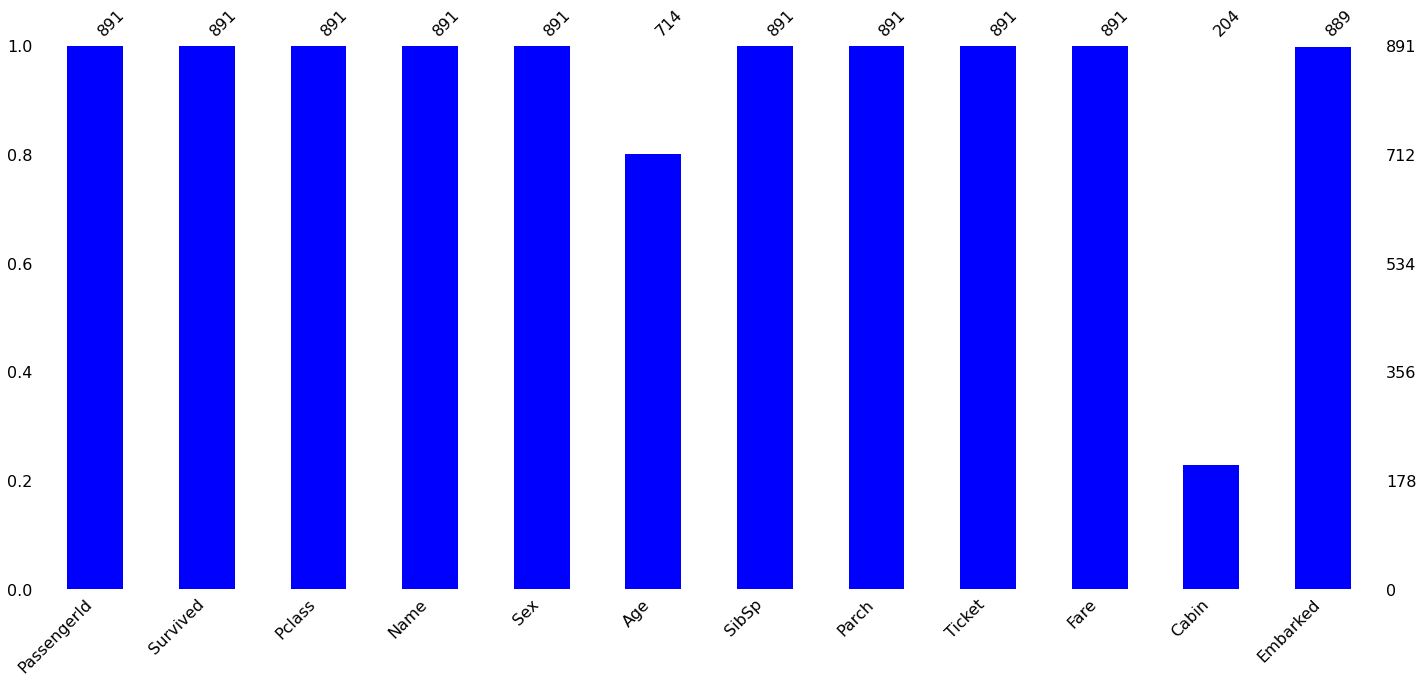

<Figure size 720x720 with 0 Axes>

In [16]:
import missingno as msno
msno.bar(df,color  = "b")
plt.figure(figsize = (10,10))
plt.show()

Filling Null Values in Age column by median

In [17]:
df["Age"].fillna(df["Age"].median(),inplace = True)
df['Age'].isnull().sum()

0

In [18]:
df["Cabin"].fillna(df["Cabin"].value_counts().index[1],inplace =True)

In [19]:
df["Cabin"].isnull().sum()

0

In [20]:
df.dropna(inplace = True)

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

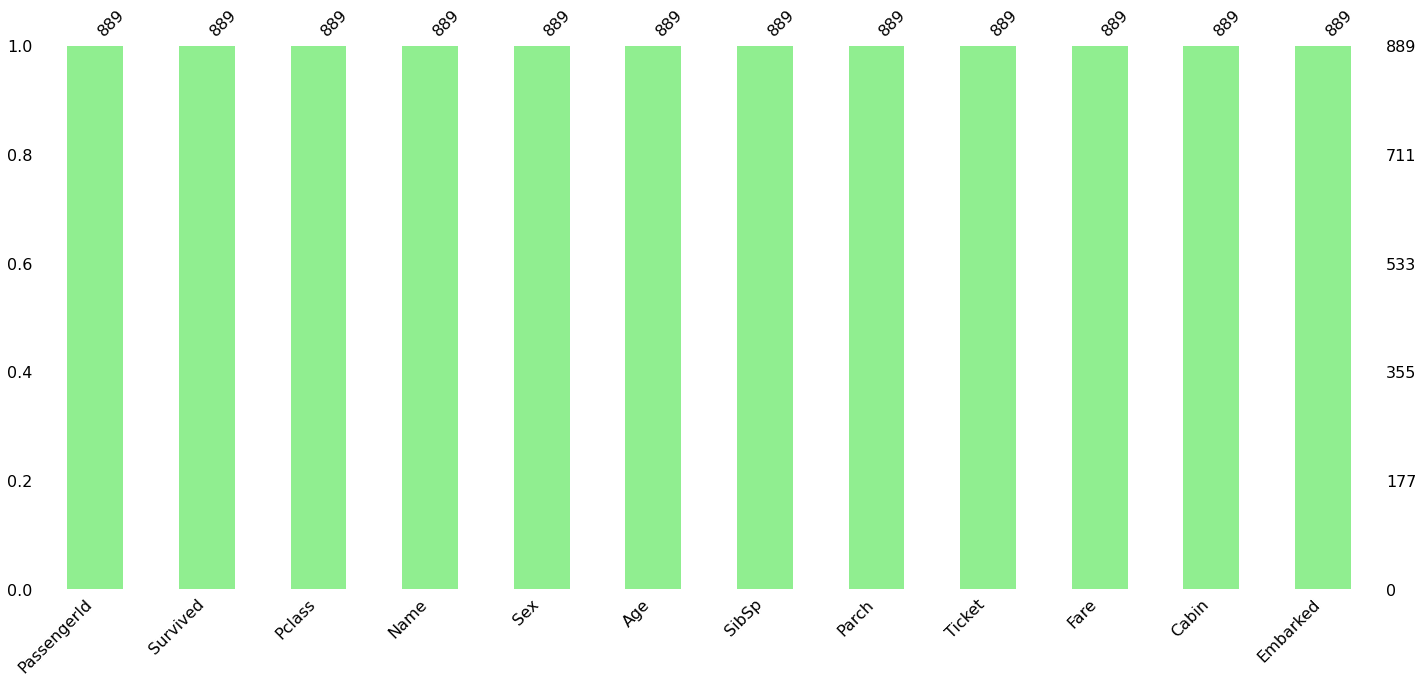

<Figure size 720x720 with 0 Axes>

In [22]:
msno.bar(df,color  = "lightgreen")
plt.figure(figsize = (10,10))
plt.show()

#### Another way of visualizing Null values using Heat map

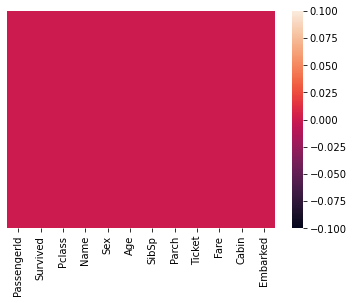

In [23]:
sns.heatmap(df.isnull(),yticklabels = False)   
plt.show()

#### Value counts for Categorical columns , Univariate and Bivariate Analysis

<AxesSubplot:>

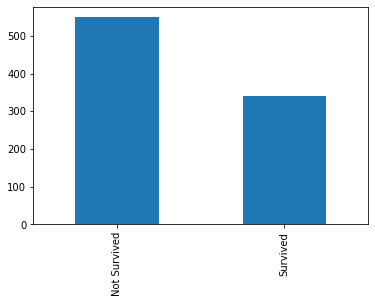

In [24]:
df["Survived"] = df["Survived"].map({0:"Not Survived",1:"Survived"})
df['Survived'].value_counts().plot(kind = "bar")

In [25]:
df["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

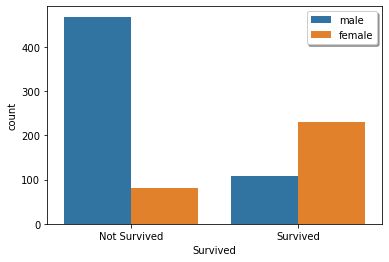

In [26]:
import warnings
warnings.simplefilter("ignore")
sns.countplot(df["Survived"],hue =df["Sex"],data = df)
plt.legend(shadow = 1)
plt.show()

In [27]:
df["Pclass"].value_counts() 

3    491
1    214
2    184
Name: Pclass, dtype: int64

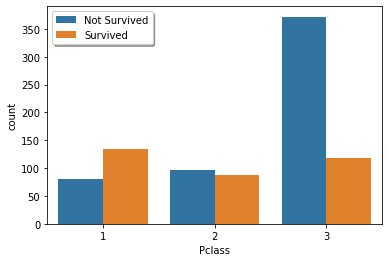

In [28]:
sns.countplot(df["Pclass"],hue =df["Survived"],data = df)
plt.legend(shadow = 1)
plt.show()

<Figure size 720x720 with 0 Axes>

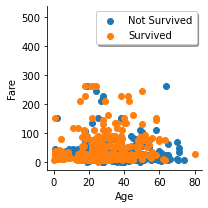

In [29]:
plt.figure(figsize = (10,10))
sns.FacetGrid(df,hue = "Survived").map(plt.scatter,"Age","Fare")
plt.legend(shadow = 1, loc = "best")
plt.show()

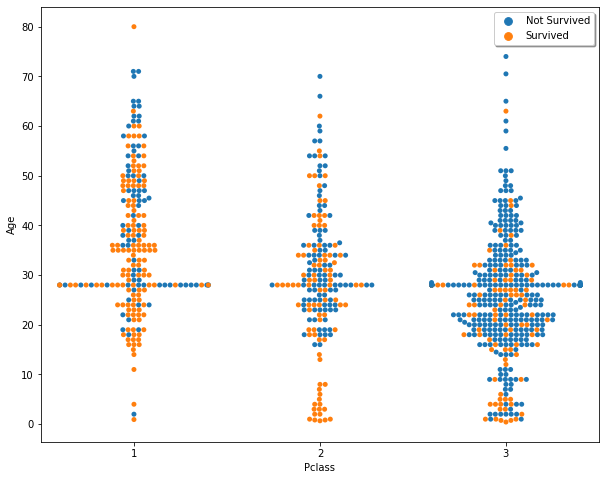

In [30]:
plt.figure(figsize = (10,8))
sns.swarmplot(x ="Pclass",y = "Age",data = df,hue = "Survived")
plt.legend(shadow = 1,loc = "best")
plt.show()

In [31]:
df.groupby("Survived").mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
Not Survived,447.016393,2.531876,30.028233,0.553734,0.329690,22.117887
Survived,444.358824,1.955882,28.163735,0.476471,0.467647,48.209498


In [32]:
categorical_columns = ["Name","Sex",'Ticket',"Cabin","Embarked"]


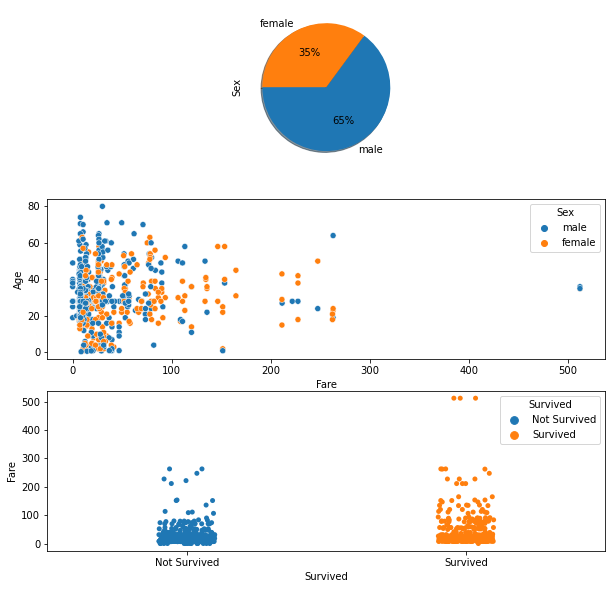

In [33]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
df["Sex"].value_counts().plot.pie(autopct = "%0.f%%",labels = df["Sex"].unique(),shadow = 1,startangle = 180)
plt.subplot(3,1,2)
sns.scatterplot(x = df["Fare"],y = df["Age"],hue = df["Sex"])
plt.subplot(3,1,3)
sns.stripplot(x = df["Survived"],y = df["Fare"],hue = df["Survived"])
plt.show()

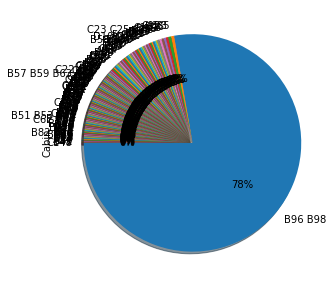

In [34]:
plt.figure(figsize = (5,5))
df["Cabin"].value_counts().plot.pie(autopct = "%0.f%%",labels = df["Cabin"].unique(),shadow = 1,startangle = 180)
plt.show()

In [35]:
numerical_columns = ["PassengerID","Pclass",'Age',"Sibsp","Fare","Survived","Parch"]

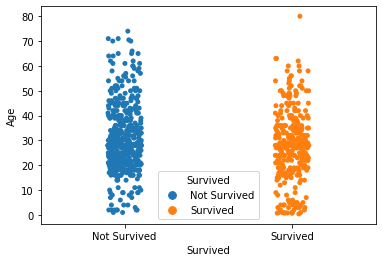

In [36]:
sns.stripplot(x = df["Survived"],y= df["Age"],hue = df["Survived"])
plt.show()

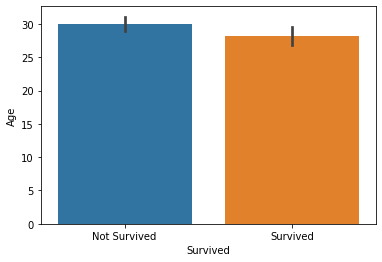

In [37]:
sns.barplot(x = df["Survived"],y = df["Age"])
plt.show()

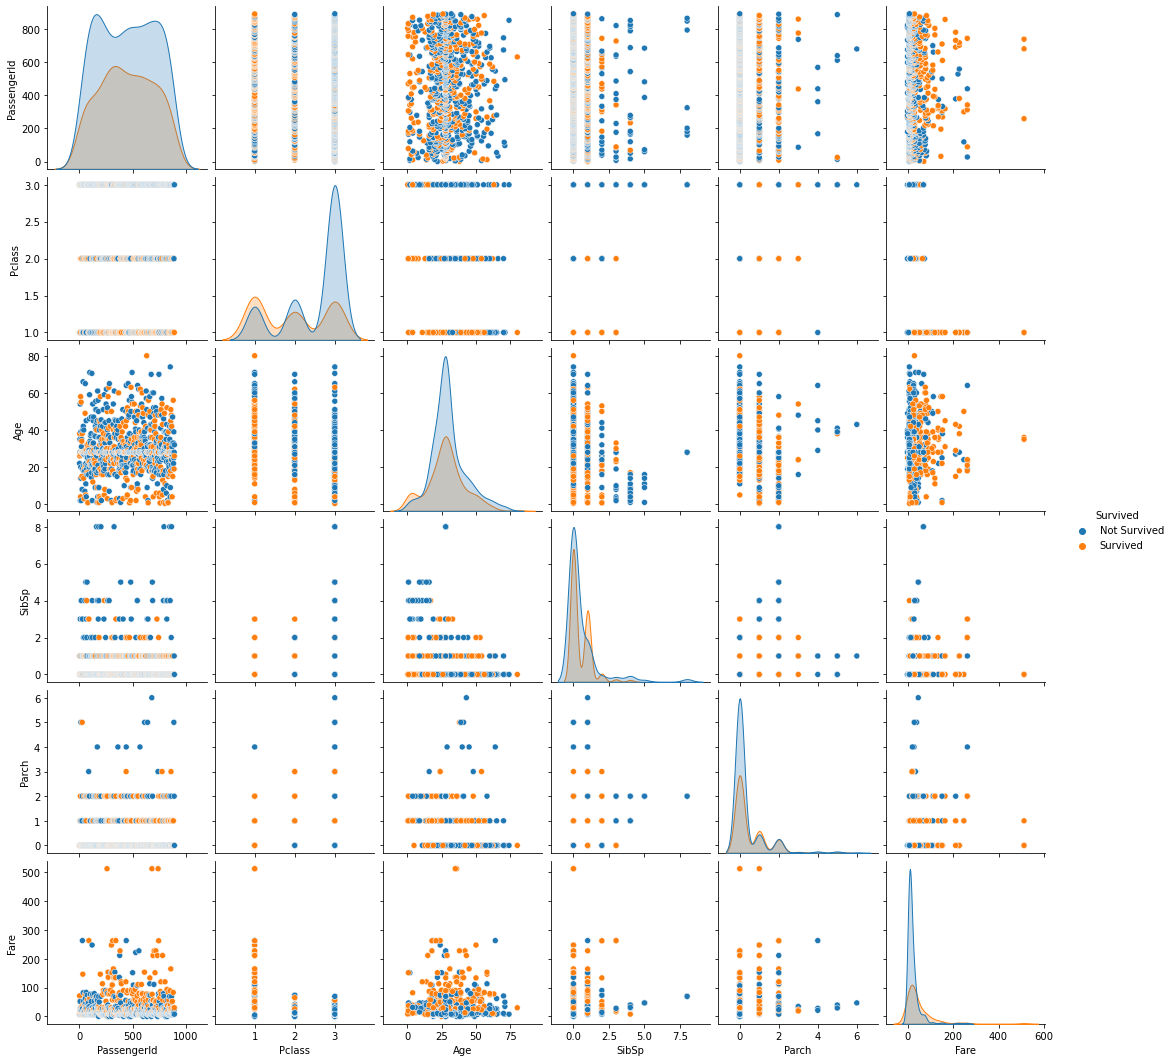

In [38]:
sns.pairplot(df,hue = "Survived")
plt.show()

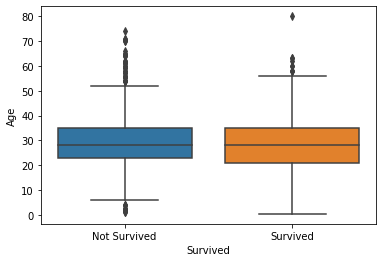

In [39]:
sns.boxplot(x = "Survived",y = "Age",data = df)
plt.show()

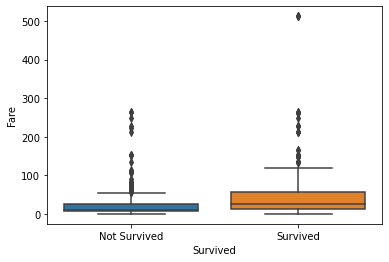

In [40]:
sns.boxplot(x = "Survived",y ="Fare",data = df )
plt.show()

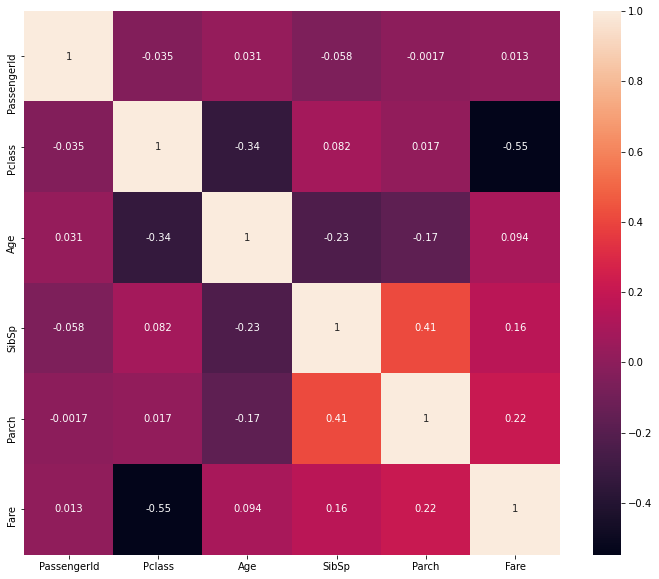

In [41]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot =True)
plt.show()